Clean version for pipeline view etc.

Steps for feature extraction:
    1. read in files
    2. make all pics same size (350 x 250)
    3. change to hsv
    4. get central square, top square, bottom square
    5. get histogram count arrays (hsv) (just get all for now?) for each square
    6. return dictionary? of hsv hist count values 

Steps for model 
    1. 

In [56]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from skimage import io, exposure, transform, color
import os
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [71]:
img_file = '/Users/amyshapiro/projects/dress_project/plaid_dress1.jpg'
img = cv2.imread(img_file, 1)

In [72]:
# 1) read in file; 
img_file = '/Users/amyshapiro/projects/dress_project/plaid_dress1.jpg'
img = cv2.imread(img_file, 1)

# 2) check photo size; if not correct size, resize to 350 x 250
if img.size != (350, 250):
    img = cv2.resize(img, (250, 350))
    
#3) change image to hsv
# Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


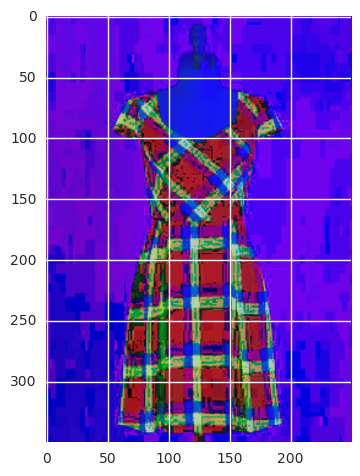

(<matplotlib.image.AxesImage at 0x1ad3afc90>, None)

In [73]:
plt.imshow(img), plt.show()

In [6]:
# 4. sample squares from dress
def get_squares(img):
    """Take in a photo, return a top, bottom, and central square of the given size (centered)"""
    top_sq = img[110:130,115:135,:]
    mid_sq = img[165:185,115:135,:]
    bottom_sq = img[300:320, 115:135,:]
    return (top_sq, mid_sq, bottom_sq)

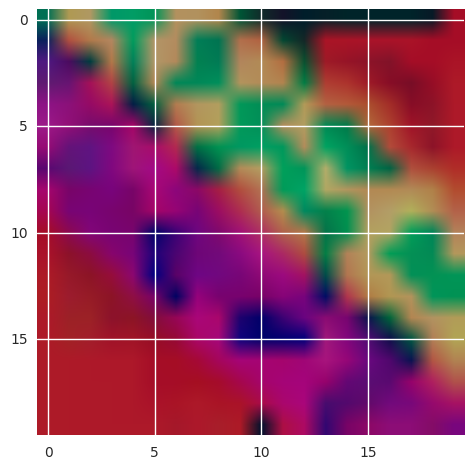

(<matplotlib.image.AxesImage at 0x1ad3b8090>, None)

In [75]:
test = get_squares(img)
plt.imshow(test[0]), plt.show()


In [3]:
# 5. get histograms for each square
#hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
# Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
def get_hsv_histograms(img):
    """Takes in an image in HSV color space and returns an array of len = 692 which is the frequency
    of pixels with each Hue[0-180], Saturation[0-256], and Value[0-256]"""
    hue_hist = cv2.calcHist([img],[0],None,[180],[0,180])
    sat_hist = cv2.calcHist([img],[1],None,[256],[0,256])
    val_hist = cv2.calcHist([img],[2],None,[256],[0,256])
    hsv_hist = np.concatenate((hue_hist, sat_hist, val_hist))
    return hsv_hist

In [182]:
mid_hist = get_histograms(test[1])
len(mid_hist)
top_hist = get_histograms(test[0])
len(top_hist)
bottom_hist = get_histograms(test[2])
bottom_hist

array([[  48.],
       [  17.],
       [  12.],
       [   7.],
       [   2.],
       [   0.],
       [   1.],
       [   0.],
       [   0.],
       [   0.],
       [   2.],
       [   0.],
       [   0.],
       [   1.],
       [   0.],
       [   3.],
       [   1.],
       [   1.],
       [   1.],
       [   0.],
       [  11.],
       [   3.],
       [   1.],
       [   4.],
       [   0.],
       [   0.],
       [   4.],
       [   1.],
       [   1.],
       [   0.],
       [  28.],
       [   0.],
       [   0.],
       [   0.],
       [   1.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   2.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [

In [156]:
top_test_concat = np.concatenate((top_test[0], top_test[1], top_test[2]))
top_test_concat

array([[ 42.],
       [ 17.],
       [ 10.],
       [  4.],
       [  2.],
       [  2.],
       [  1.],
       [  1.],
       [  1.],
       [  0.],
       [  4.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  

In [68]:
plt.imshow(sq_test[0]), plt.show()

NameError: name 'sq_test' is not defined

In [286]:
    img = cv2.imread(img_file, 1)
    
            
    #2. resize image if not 250(L) x 350(H)
    if img.size != (250, 350):
        img = cv2.resize(img, (250, 350))
    
    #3. convert image to HSV colorspace
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #4. get top, mid, and bottom squares
    square_trio = get_squares(img)
    
    #5. get histograms from each square
    top_hist = pd.DataFrame(get_hsv_histograms(square_trio[0]), columns = [os.path.basename(img_file)])
    mid_hist = pd.DataFrame(get_hsv_histograms(square_trio[1]), columns = [os.path.basename(img_file)])
    bottom_hist = pd.DataFrame(get_hsv_histograms(square_trio[2]), columns = [os.path.basename(img_file)])
    hist = top_hist.append(mid_hist, ignore_index = True).append(bottom_hist, ignore_index = True).transpose()
    frames = []
    frames.append(hist)
   

In [287]:
frames

[                                              0     1     2     3     4     \
 332381e53956ab38da1b2bca4db2ee914d2e6592.jpg   1.0   0.0   0.0   0.0   0.0   
 
                                               5     6     7     8     9     \
 332381e53956ab38da1b2bca4db2ee914d2e6592.jpg   0.0   1.0   0.0   0.0   0.0   
 
                                               ...   2066  2067  2068  2069  \
 332381e53956ab38da1b2bca4db2ee914d2e6592.jpg  ...    0.0   0.0   0.0   0.0   
 
                                               2070  2071  2072  2073  2074  \
 332381e53956ab38da1b2bca4db2ee914d2e6592.jpg   0.0   0.0   0.0   0.0   0.0   
 
                                               2075  
 332381e53956ab38da1b2bca4db2ee914d2e6592.jpg   0.0  
 
 [1 rows x 2076 columns], 'a']

In [4]:
import glob
list_of_jpgs = glob.glob('/Users/amyshapiro/projects/dress_project/modscrape_second/files/images/full/*.jpg')
#list_of_jpgs = glob.glob('/Users/amyshapiro/projects/dress_project/modscrape_second/files/images/test/*.jpg')

In [7]:

frames = []

for img_file in list_of_jpgs:

    #1. read in image  
    img = cv2.imread(img_file, 1)
    
    
    #2. resize image if not 250(L) x 350(H)
    if img.size != (250, 350):
        img = cv2.resize(img, (250, 350))
    
    #3. convert image to HSV colorspace
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #4. get top, mid, and bottom squares
    square_trio = get_squares(img)
    
    #5. get histograms from each square
    top_hist = pd.DataFrame(get_hsv_histograms(square_trio[0]), columns = [os.path.basename(img_file)])
    mid_hist = pd.DataFrame(get_hsv_histograms(square_trio[1]), columns = [os.path.basename(img_file)])
    bottom_hist = pd.DataFrame(get_hsv_histograms(square_trio[2]), columns = [os.path.basename(img_file)])
    hist = top_hist.append(mid_hist, ignore_index = True).append(bottom_hist, ignore_index = True).transpose()
    frames.append(hist)
    
data_df = pd.concat(frames)
    

In [10]:
filename = list(data_df.index)


In [9]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075
0009361c38a68b96aefc3a5705902d83bf30c3ec.jpg,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00155ad46f94d065640f231a3b3bac2163c6e717.jpg,5.0,3.0,4.0,2.0,7.0,1.0,3.0,1.0,6.0,7.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
00284e30d343b273153d903c598e9d3f6f913a8e.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
002f68230d2518060083049137e364a95fbe817f.jpg,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003217a678b039b44de04ecdc64bed766978b9d0.jpg,7.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
00488c11f31eb1bfb7b1c52c2effb9b615475451.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0057f871421c6cbc2a2a11f02fb7a77a0454cda5.jpg,13.0,5.0,7.0,13.0,9.0,13.0,17.0,8.0,11.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006f56edb8894d523c42a5f511c8e4827cfe86f5.jpg,20.0,2.0,5.0,7.0,13.0,30.0,76.0,14.0,32.0,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0070fe5b39723380c5ec22a0006674b49a46ba04.jpg,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007130d23463662a78dfc2f5044e21448e398bbc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
mod_scrape = pd.read_json('/Users/amyshapiro/projects/dress_project/modscrape_second/listings.json')
mod_scrape['dress_id'] = mod_scrape.index
mod_scrape_reduced = mod_scrape[['detail_url', 'dress_id']]

In [12]:
def get_paths_to_image(list_of_dicts):
    """Take in a list of dictionaries with field 'path' and
    return a list of cleaned 'paths'"""
    list_of_paths = []
    for num in range(0,len(list_of_dicts)):
        list_of_paths.append(list_of_dicts[num]['path'][5:])
    return list_of_paths

In [13]:
mod_scrape['image_paths'] = mod_scrape.images.apply(get_paths_to_image)

In [14]:
dress_images = mod_scrape[['detail_url','image_paths']]

In [15]:
test_dict = {}
for num in dress_images.index:
    for img in dress_images.image_paths[num]:
        test_dict[img] = num

In [16]:
img_dress_link = pd.DataFrame.from_dict(test_dict, orient = 'index')

In [17]:
img_dress_link.columns = ['dress_id']
img_dress_link['image_filename'] = img_dress_link.index

In [18]:
dress_images_merged = pd.merge(img_dress_link, mod_scrape_reduced, how = 'left', on = 'dress_id' )

In [19]:
data_df['image_filename'] = data_df.index

In [20]:
data_df_merged = pd.merge(data_df, dress_images_merged, how = 'inner', on = 'image_filename')
data_df_merged

,0,1,2,3,4,5,6,7,8,9,...,2069,2070,2071,2072,2073,2074,2075,image_filename,dress_id,detail_url
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0009361c38a68b96aefc3a5705902d83bf30c3ec.jpg,213,http://www.modcloth.com/shop/dresses/to-sevich...
1,5.0,3.0,4.0,2.0,7.0,1.0,3.0,1.0,6.0,7.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,00155ad46f94d065640f231a3b3bac2163c6e717.jpg,971,http://www.modcloth.com/shop/dresses/fanciful-...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,0.0,1.0,0.0,0.0,00284e30d343b273153d903c598e9d3f6f913a8e.jpg,795,http://www.modcloth.com/shop/dresses/it-s-a-wo...
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,002f68230d2518060083049137e364a95fbe817f.jpg,846,http://www.modcloth.com/shop/dresses/creatures...
4,7.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,003217a678b039b44de04ecdc64bed766978b9d0.jpg,676,http://www.modcloth.com/shop/dresses/peppy-pic...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00488c11f31eb1bfb7b1c52c2effb9b615475451.jpg,817,http://www.modcloth.com/shop/dresses/festive-f...
6,20.0,2.0,5.0,7.0,13.0,30.0,76.0,14.0,32.0,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,006f56edb8894d523c42a5f511c8e4827cfe86f5.jpg,360,http://www.modcloth.com/shop/dresses/the-best-...
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0070fe5b39723380c5ec22a0006674b49a46ba04.jpg,863,http://www.modcloth.com/shop/dresses/up-and-we...
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,007130d23463662a78dfc2f5044e21448e398bbc.jpg,727,http://www.modcloth.com/shop/dresses/sweetness...
9,11.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0083bfaac3f31b133e47711667843d805f313657.jpg,63,http://www.modcloth.com/shop/dresses/vino-de-j...


In [22]:
X = data_df_merged.ix[:,:2076]
y = data_df_merged.ix[:, 'detail_url']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [87]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [88]:
pred = clf.predict(X_test)

In [28]:
pred_df = pd.DataFrame(pred)

In [89]:
from sklearn.metrics import accuracy_score

dt_score = accuracy_score(y_test, pred, normalize=True, sample_weight=None)

In [91]:
score

0.13727359389895138

In [92]:
from sklearn.neighbors import KNeighborsClassifier
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model on the training data.
knn.fit(X_train, y_train)
# Make point predictions on the test set using the fit model.
#predictions = knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [93]:
predictions = knn.predict(X_test)

In [41]:
predictions

array([ u'http://www.modcloth.com/shop/dresses/lawfully-wedded-blithe-wedding-dress-in-white',
       u'http://www.modcloth.com/shop/dresses/elevate-the-evening-dress',
       u'http://www.modcloth.com/shop/dresses/hideaway-for-the-weekend-maxi-dress',
       ...,
       u'http://www.modcloth.com/shop/dresses/peeks-and-valleys-dress',
       u'http://www.modcloth.com/shop/dresses/terrace-entertaining-maxi-dress',
       u'http://www.modcloth.com/shop/dresses/vino-de-janeiro-dress'], dtype=object)

In [94]:
score_knn = accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

In [95]:
score_knn

0.41754051477597715

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca_fit = pca.fit_transform(X_train)


In [52]:
print(pca.explained_variance_ratio_)

[ 0.04684861  0.04295901  0.03436669  0.02939339  0.02322788  0.02127663
  0.01889664  0.01787182  0.01559054  0.01417423  0.01321562  0.0131018
  0.01162944  0.01125377  0.01117015  0.01044633  0.01010498  0.00988948
  0.00929609  0.00904653  0.0089163   0.00858213  0.00837     0.0078391
  0.00768843  0.00727054  0.00697379  0.00676589  0.00660738  0.0063799
  0.00626309  0.00614326  0.0059894   0.00598137  0.00590645  0.00576102
  0.00567211  0.00544929  0.00536806  0.00523776  0.00520821  0.00506038
  0.00488436  0.00476797  0.0047404   0.00462137  0.00450775  0.0044372
  0.00437478  0.00432876  0.004313    0.00422511  0.00406723  0.00401539
  0.00396372  0.0038709   0.00381285  0.0037456   0.00368455  0.00363753
  0.00358496  0.0035374   0.00347413  0.00345316  0.00338838  0.00336015
  0.00329446  0.0032648   0.00319892  0.00315786  0.00311093  0.00302549
  0.00300129  0.00296214  0.00293503  0.00290925  0.00287969  0.0028628
  0.00278717  0.00276088  0.00272548  0.00267394  0.0026

200

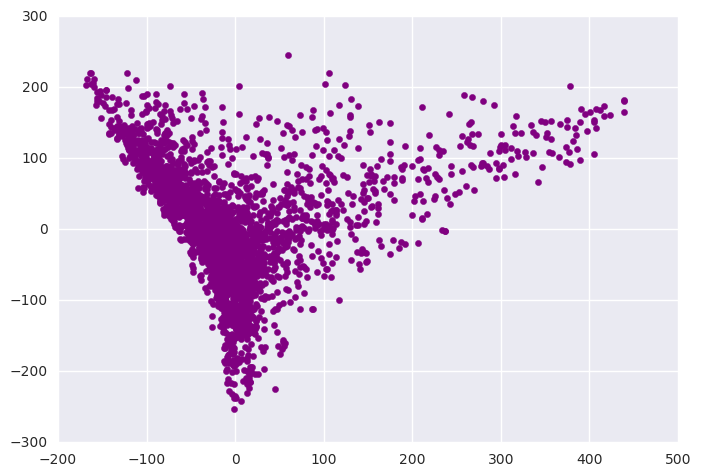

In [67]:

plt.scatter(pca_fit[:,0],pca_fit[:,1], color = 'purple')
plt.show()

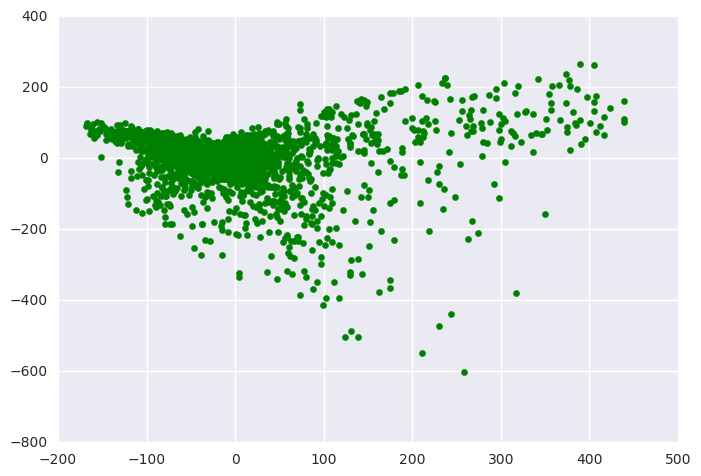

In [76]:

plt.scatter(pca_fit[:,0],pca_fit[:,2], color = 'green')
plt.show()

In [35]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  )  
#tree.export_graphviz(clf, out_file='tree.dot') 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: Program terminated with status: -11. stderr follows: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0880973 to fit
dot(20276,0x10eeb9310) malloc: *** mach_vm_map(size=18446744071822626816) failed (error code=3)
*** error: can't allocate region
*** set a breakpoint in malloc_error_break to debug
dot: failure to create cairo surface: out of memory
